In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/GeeksforgeeksDS/EDA-Sugarcane-Project/refs/heads/main/List%20of%20Countries%20by%20Sugarcane%20Production.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [ ]:
df.shape

(103, 7)

# data cleaning

In [ ]:
df['Production (Tons)'] =  df['Production (Tons)'].str.replace('.','')
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(",",".")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df = df.drop( "Unnamed: 0", axis = 1)


In [ ]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [ ]:
df.isna().sum()

,0
Country,0
Continent,0
Production(Tons),0
Production_per_person(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [ ]:
df[df['Acreage(Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [ ]:
df.dropna().reset_index()

,index,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,11949.8


In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [ ]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_person(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [ ]:
df.nunique()

,0
Country,103
Continent,6
Production(Tons),103
Production_per_person(Kg),102
Acreage(Hectare),101
Yield(Kg/Hectare),102


# Univariate analysis

## How many countries produce sugarcane from each continent

In [ ]:
df['Continent'].value_counts()

,count
Continent,
Africa,39
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

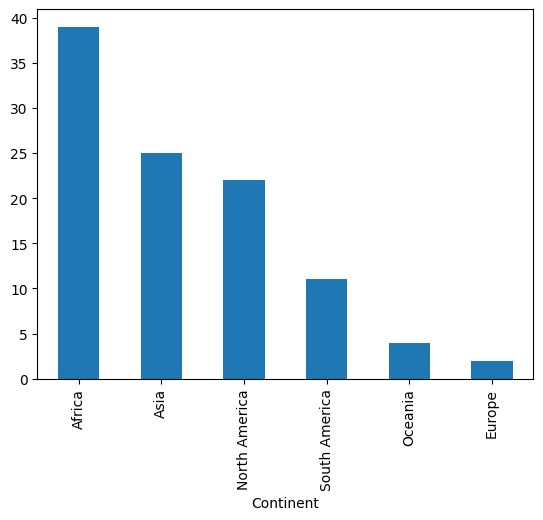

In [ ]:
df['Continent'].value_counts().plot(kind='bar')

<ipython-input-19-2284553739>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
<ipython-input-19-2284553739>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_person(Kg)'])
<ipython-input-19-2284553739>:7: UserWarning: 

`distplot` is a deprecated functi

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

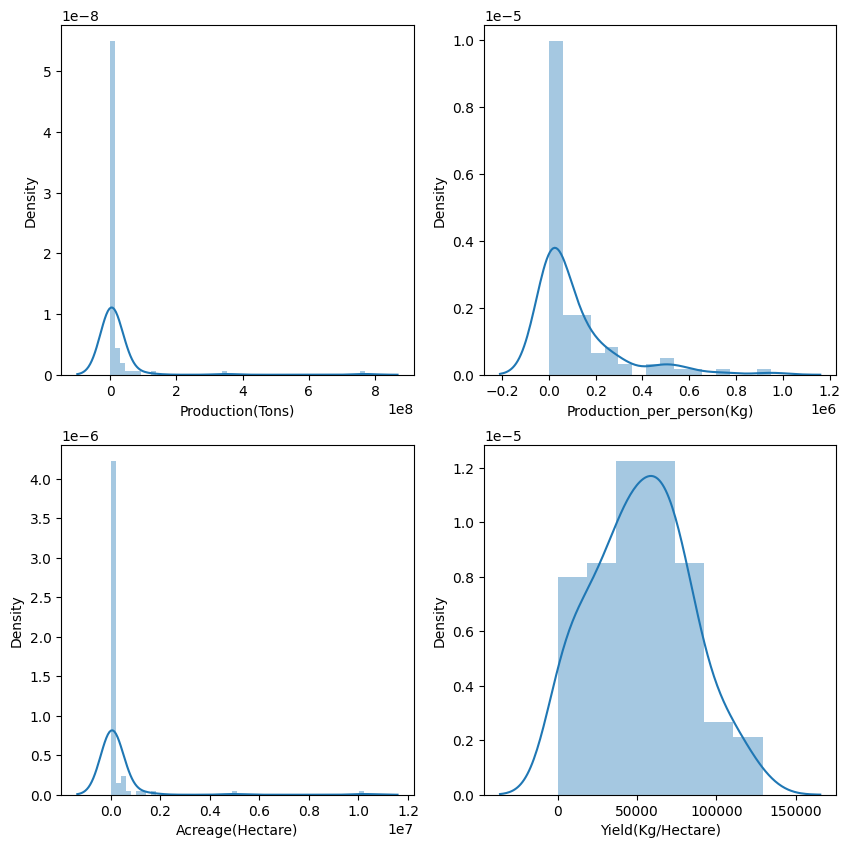

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

<Axes: ylabel='Yield(Kg/Hectare)'>

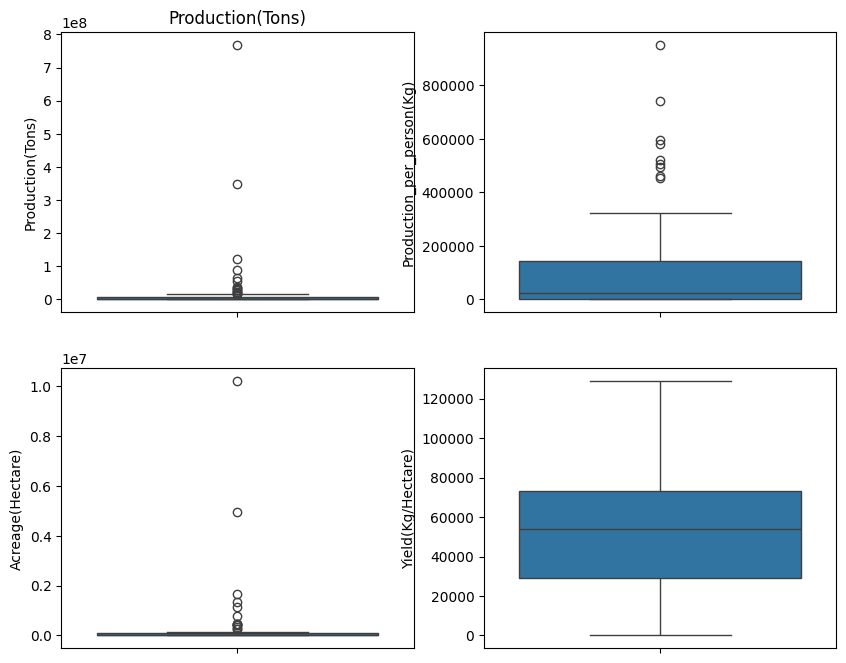

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [ ]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

## Which country produces maximum sugarcane

In [ ]:
df_new = df[['Country','Production(Tons)']].set_index('Country')
df_new.head()

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [ ]:
df_new['Percentage production'] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()
df_new.head()

,Production(Tons),Percentage production
Country,,
Brazil,768678382.0,40.727284
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Percentage production'>

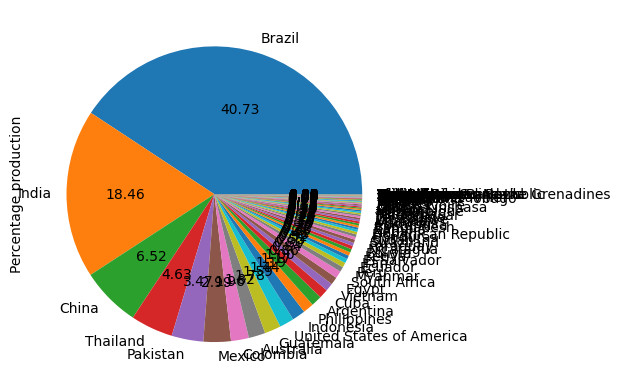

In [ ]:
df_new['Percentage production'].plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Country'>

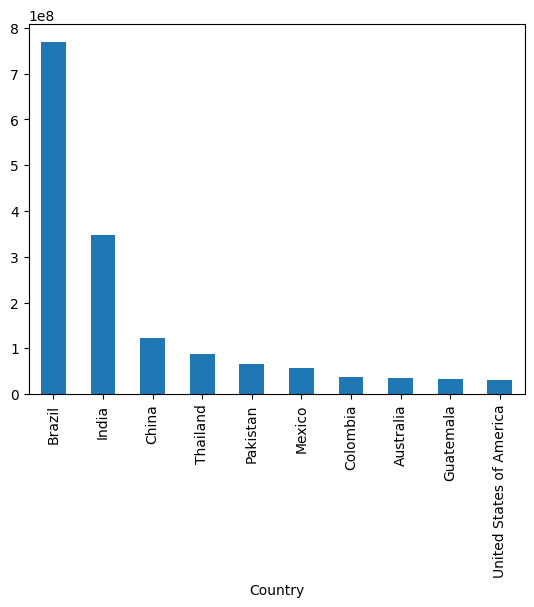

In [ ]:
df_new['Production(Tons)'].head(10).plot(kind='bar')

<ipython-input-34-557536040>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


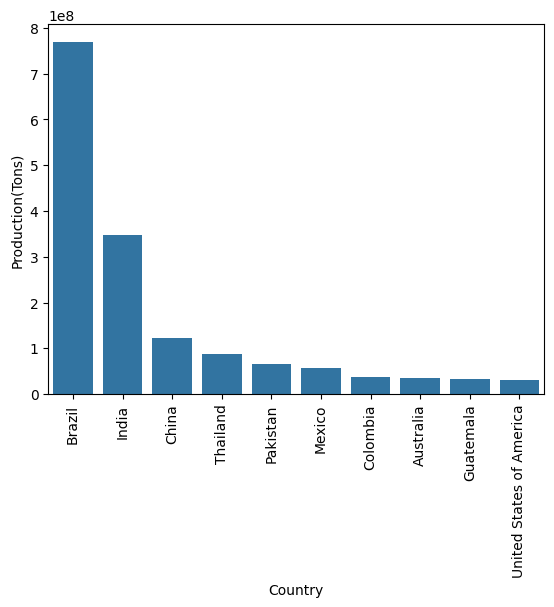

In [ ]:
ax = sns.barplot(data=df.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which country has the highest land

<ipython-input-40-2322200522>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


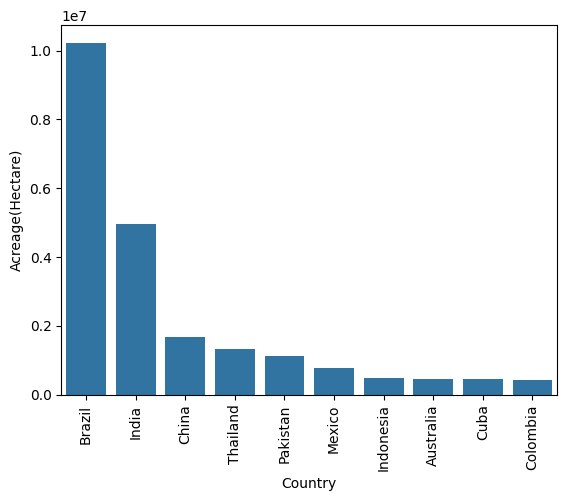

In [ ]:
df_acr = df.sort_values(by='Acreage(Hectare)',ascending=False)

ax = sns.barplot(data=df_acr.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Country with maximum yield per hectare

<ipython-input-42-3454193629>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


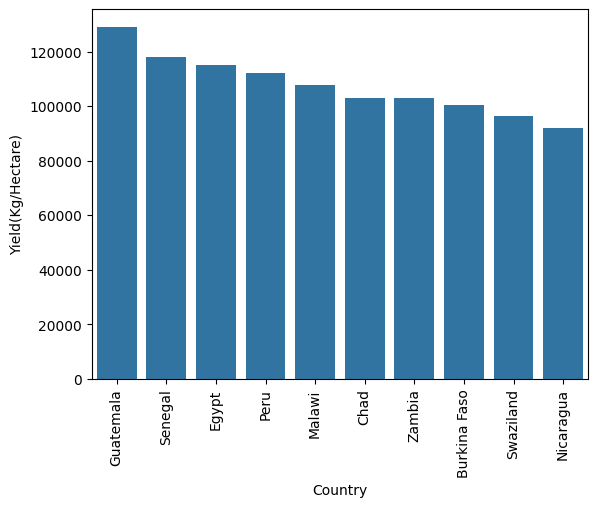

In [ ]:
df_acr = df.sort_values(by='Yield(Kg/Hectare)',ascending=False)

ax = sns.barplot(data=df_acr.head(10),x='Country',y='Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which country has the highest production per person kg

<ipython-input-44-2986230413>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


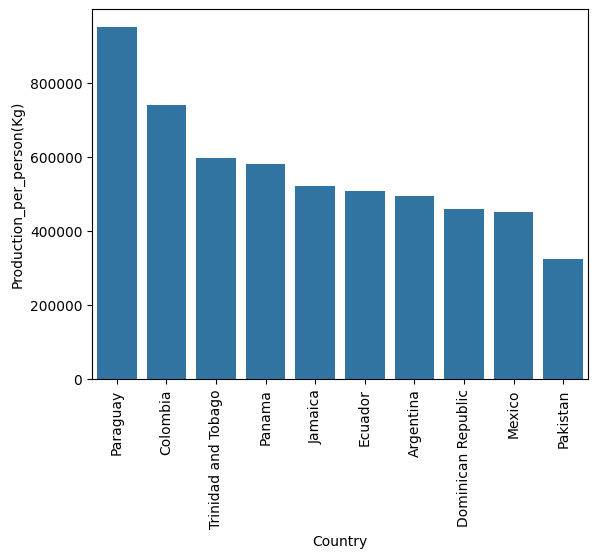

In [ ]:
df_acr = df.sort_values(by='Production_per_person(Kg)',ascending=False)

ax = sns.barplot(data=df_acr.head(10),x='Country',y='Production_per_person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Correlation

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()


,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.016341,0.997550,0.132812
Production_per_person(Kg),0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


Do countrues with highest land produce most sugarcane

<Axes: >

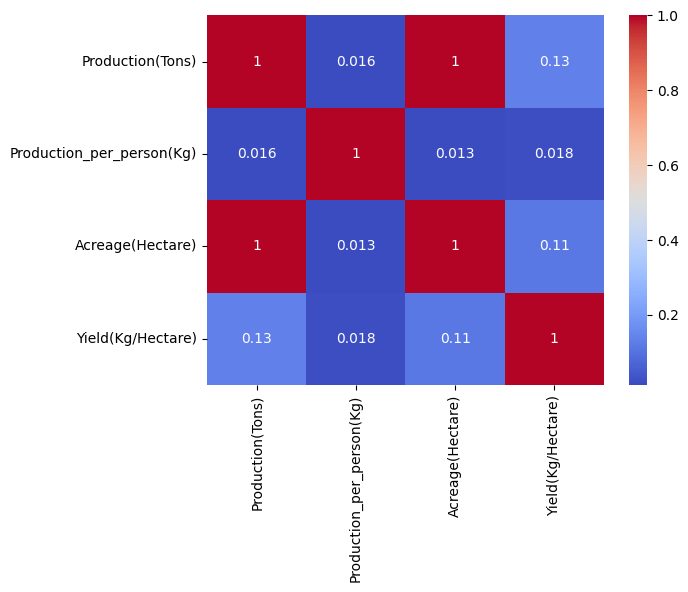

In [ ]:
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

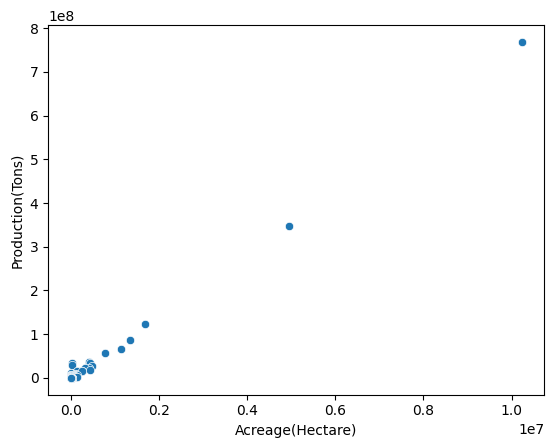

In [ ]:
sns.scatterplot(data=df,x='Acreage(Hectare)',y='Production(Tons)')

Do countries which yield more sugarcane per hectare produces more sugarcane in total

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

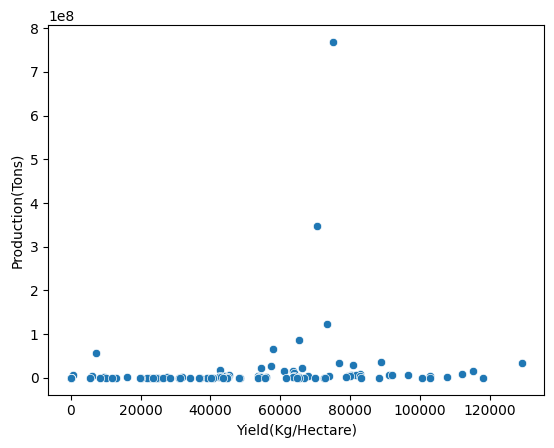

In [ ]:
sns.scatterplot(data=df,x='Yield(Kg/Hectare)',y='Production(Tons)')

# Analysis for continent

In [ ]:
df_continent = df.groupby('Continent').sum()
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


## which continent produces maximum sugarcane

<Axes: xlabel='Continent'>

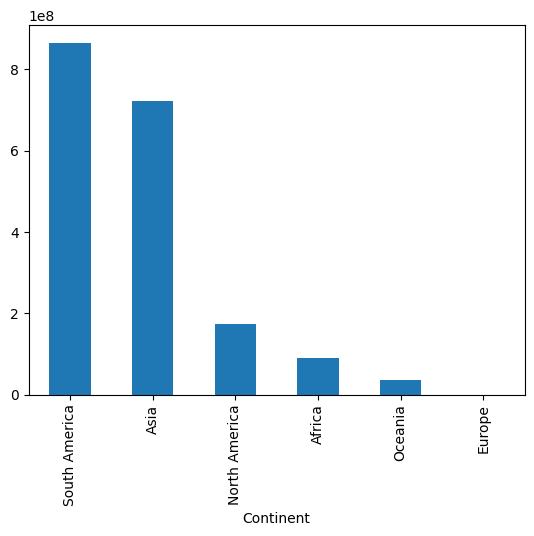

In [ ]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

## number of countries in a continent

In [ ]:
df['Continent'].value_counts()

,count
Continent,
Africa,39
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


Which continent has the highest land

<Axes: xlabel='Continent'>

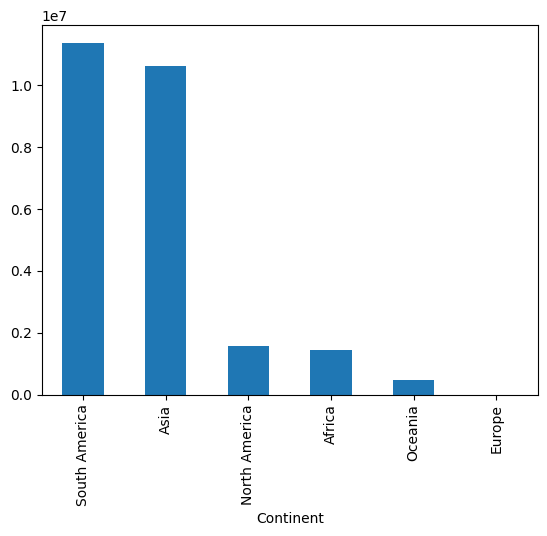

In [ ]:
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

## Do number of countries in a continent effects production of sugarcane

In [ ]:
df_continent['numberofcountries'] = df.groupby('Continent').count()['Country']


In [ ]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),numberofcountries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


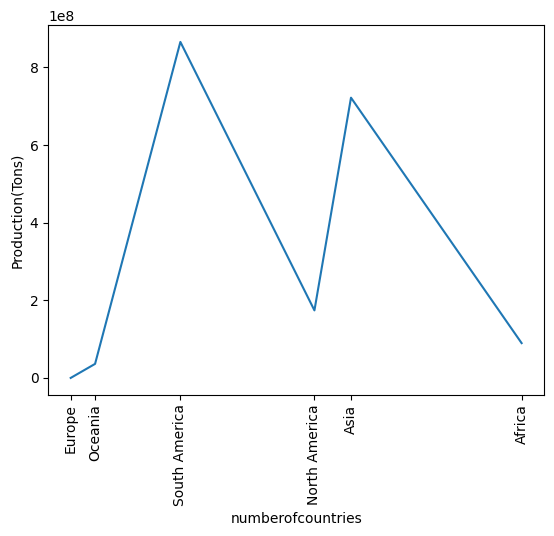

In [ ]:
cont_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x='numberofcountries',y='Production(Tons)')
plt.xticks(df_continent['numberofcountries'],cont_names,rotation=90)
plt.show()

## Do continents with largest land produces more sugarcane

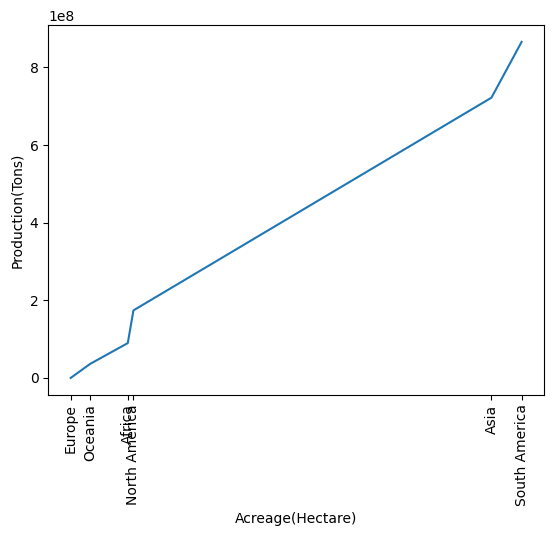

In [ ]:
sns.lineplot(data = df_continent,x='Acreage(Hectare)',y='Production(Tons)')
plt.xticks(df_continent['Acreage(Hectare)'],cont_names,rotation=90)
plt.show()

## Production distribution by continents

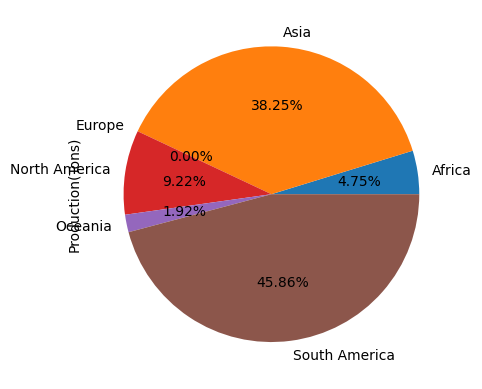

In [ ]:
df_continent['Production(Tons)'].plot(kind='pie',autopct='%.2f%%')
plt.show()

## Correlation for continent

In [ ]:
df_numeric = df_continent.select_dtypes(include=['number'])
df_numeric.corr()


,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),numberofcountries
Production(Tons),1.000000,0.522207,0.994897,0.091201,0.098495
Production_per_person(Kg),0.522207,1.000000,0.463211,0.542971,0.531984
Acreage(Hectare),0.994897,0.463211,1.000000,0.111166,0.122407
Yield(Kg/Hectare),0.091201,0.542971,0.111166,1.000000,0.991746
numberofcountries,0.098495,0.531984,0.122407,0.991746,1.000000
